- The code trains a simple neural network on the MNIST dataset - handwritten digits from 0 - 9.
- It visualizes sample images along with their true and predicted labels.
- This helps you understand how well the model is performing and identify areas for improvement.

In [38]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras import layers, models

In [39]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

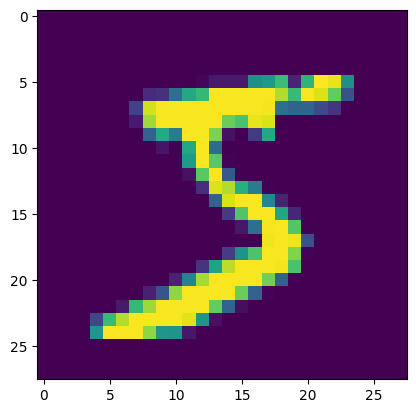

In [41]:
# plot the image of xtrain[0]
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])
plt.show()

In [42]:
# now lets look at y_train[0]
print(y_train[0])

5


In [43]:
# Build a simple neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input
    layers.Dense(128, activation='relu'), # Hidden layer
    layers.Dropout(0.2), # Dropout layer
    layers.Dense(10, activation='softmax') # Output layer
])

c:\Workspace\MyProjects\DeepLearning\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [45]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8554 - loss: 0.4890
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9548 - loss: 0.1484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9686 - loss: 0.1047
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0720


In [46]:
# Evaluate the model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0747


[0.06765247136354446, 0.9799000024795532]

In [71]:
# Predict the labels for the test set
import numpy as np
y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Now lets look at X_test and y_pred

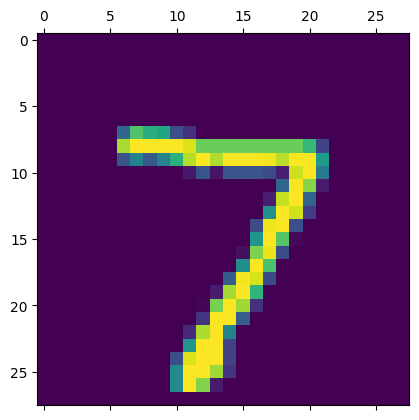

In [48]:
plt.matshow(x_test[0])

In [49]:
print(y_pred[0])

7


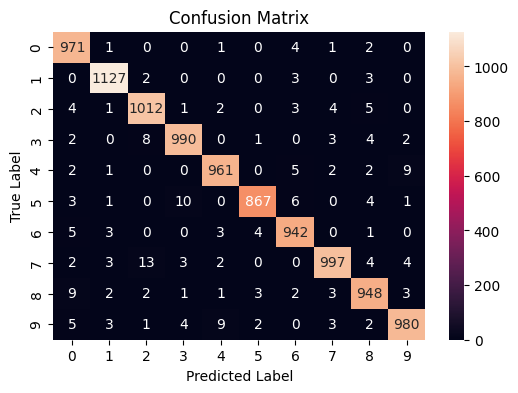

In [79]:
# plot seaborn heatmap
import seaborn as sns
# Create confustion matrix
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0747
Test Accuracy: 97.99%


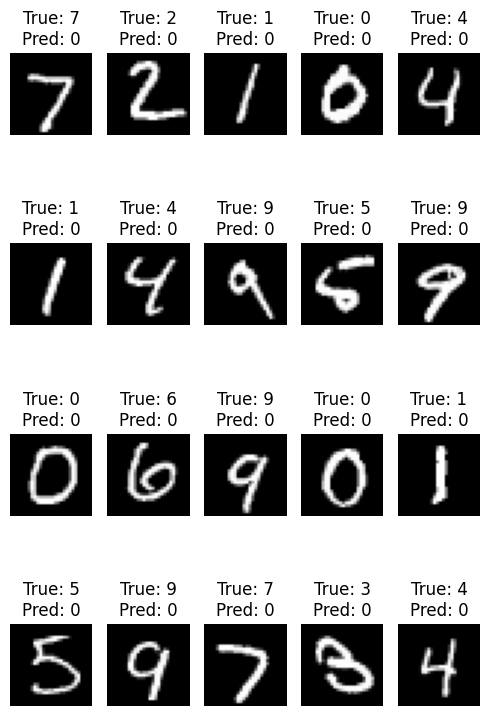

In [83]:
# Function to plot images and their predictions
def plot_sample_images(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(5, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {np.argmax(predicted_labels[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some sample images with their true and predicted labels
plot_sample_images(x_test, y_test, y_pred, num_samples=20)

Observation:
- if the test accuracy is very low (e.g., < 10%), the model is not learning effectively.
- If the test accuracy is reasonable (e.g., > 90%), the issue might be specific to the samples you’re visualizing.

### Improve the model

In [56]:
# Increase the Number of Epochs
model.fit(x_train, y_train, epochs=10)  # Increase from 5 to 10 or more

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9798 - loss: 0.0616
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9831 - loss: 0.0542
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9844 - loss: 0.0495
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9853 - loss: 0.0437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9870 - loss: 0.0395
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9879 - loss: 0.0364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9879 - loss: 0.0373
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9888 - loss: 0.0328
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9899 - loss: 0.0308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9894 - loss: 0.0308


In [57]:
# Add More Layers or Neurons
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),  # Increase neurons
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),  # Add another layer
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

c:\Workspace\MyProjects\DeepLearning\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# Use a Different Optimizer
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.1302
Test Accuracy: 97.95%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


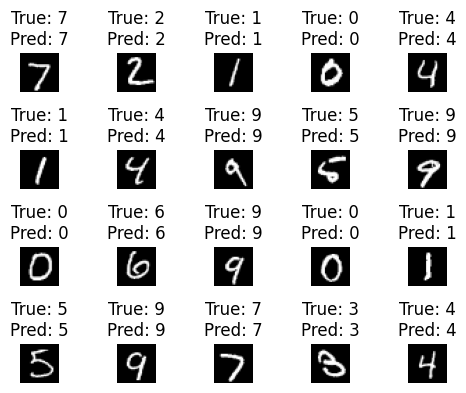

In [68]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions again
y_pred = model.predict(x_test)

# Visualize the results
plot_sample_images(x_test, y_test, y_pred, num_samples=20)

### Here the accuracy has improved and all our first 20 samples have been predicted correctly.

Correct Predictions:


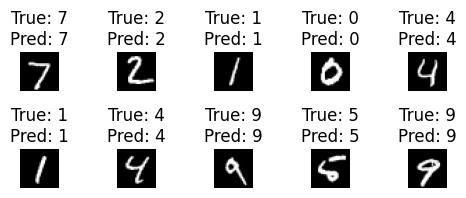

Incorrect Predictions:


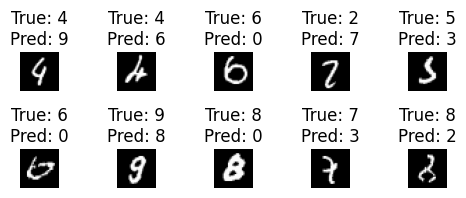

In [69]:
# Find indices of correct and incorrect predictions
correct_indices = np.where(np.argmax(y_pred, axis=1) == y_test)[0]
incorrect_indices = np.where(np.argmax(y_pred, axis=1) != y_test)[0]

# Plot some correct predictions
print("Correct Predictions:")
plot_sample_images(x_test[correct_indices], y_test[correct_indices], y_pred[correct_indices], num_samples=10)

# Plot some incorrect predictions
print("Incorrect Predictions:")
plot_sample_images(x_test[incorrect_indices], y_test[incorrect_indices], y_pred[incorrect_indices], num_samples=10)


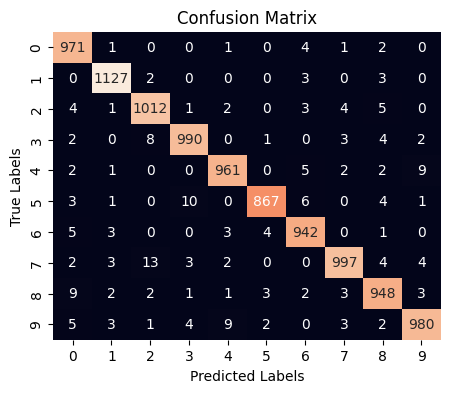

In [66]:
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()